# In this notebook I want to 
-create 256 X 256 data <br>
-create a UNET that works for this data <br>
-Train the model <br>
-Assess the results 

From what I did before Using 32X32 images, it seems that the network still tries to create signal out of noisy images. 

In [2]:
#Importing packages

## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff
             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
            ####################


In [3]:
#machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical   
###
from keras import models
from keras import layers

#from __future__ import print_function
#import keras
from keras import backend as K
#import matplotlib
#from matplotlib import pyplot as plt
#import numpy as np
from keras.preprocessing.image import ImageDataGenerator
###
import pickle as pkl
import time

Using TensorFlow backend.


In [4]:
# reading the data 
df_good = pd.read_pickle("/users/PAS1495/akl2/work/Project/Notebooks/shuffled_good_df-Copy1.pkl")
df_bad=  pd.read_pickle("/users/PAS1495/akl2/work/Project/Notebooks/shuffled_bad_df-Copy1.pkl")
## making the pictures into numpy arrays, they are already shuffled so I can just split them as following. 
X = df_good.values #HSN images
y = df_bad.values  #LSN images


In [5]:
print(len(X))
print(len(y))

2300
2300


## Cropping

In [6]:

X_crop=[]
for sample in X:
    x_reshaped=sample.reshape(1200,1200)
    for i in range(2,7):
        for j in range(2,7):
            X_crop.append(x_reshaped[i*128:(i+1)*128, j*128:(j+1)*128])
            
y_crop=[]
for sample in y:
    y_reshaped=sample.reshape(1200,1200)
    for i in range(2,7):
        for j in range(2,7):
            y_crop.append(y_reshaped[i*128:(i+1)*128, j*128:(j+1)*128])

In [7]:
X_crop = np.asarray(X_crop)
y_crop  = np.asarray(y_crop)

In [8]:
print('shape of original bad images', X_crop.shape)
print('shape of original good images',y_crop.shape)

shape of original bad images (57500, 128, 128)
shape of original good images (57500, 128, 128)


In [9]:
#Saving them for future 
np.save('bd_orig_128.npy', X_crop, allow_pickle= True)
np.save('gd_orig_128.npy', y_crop, allow_pickle=True)

In [7]:
np.save('bd_orig_128.npy', y, allow_pickle= True)
np.save('gd_orig_128.npy', x, allow_pickle=True)

In [8]:
x = np.load('bd_orig_128.npy')
y = np.load('gd_orig_128.npy')

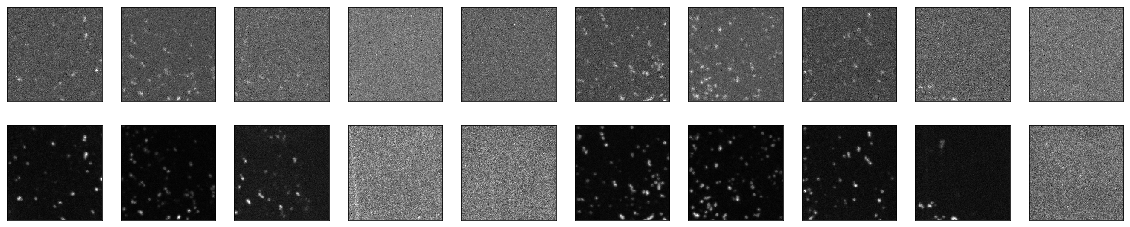

In [9]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Loading data

In [ ]:
#shuffle and save
